### Non-hierarchical clustering (kmeans) using two columns  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#### Parameters  

In [2]:
csv_in = 'ai-end2-3.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


#### Separate data  

In [4]:
df_data = df.loc[:, 'mean radius': 'worst fractal dimension']
print(df_data.shape)
display(df_data.head())

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(df_data)
print(X_std.shape)
display(X_std)

n_cls = 5
km = KMeans(n_clusters=n_cls, random_state=20)
cls = km.fit_predict(X_std)

(569, 30)


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### See the results of clustering  

In [6]:
print(cls)
print(pd.Series(cls).value_counts())

[4 0 0 2 0 2 0 2 2 2 1 0 4 0 2 2 0 2 0 3 3 3 2 0 0 4 2 0 2 0 4 2 0 0 2 0 2
 1 1 2 1 3 4 2 1 0 3 2 3 1 1 1 1 0 1 3 0 2 1 3 3 3 2 3 2 2 3 1 2 1 0 2 2 3
 1 0 3 4 4 1 3 2 4 0 3 0 3 0 3 3 1 3 1 1 0 0 3 3 3 3 1 3 1 3 3 2 3 1 4 3 3
 3 2 3 3 3 3 2 2 0 3 0 4 3 1 1 1 0 3 0 3 0 0 1 0 1 1 1 0 3 1 0 3 1 1 3 2 3
 3 1 3 2 2 3 3 1 0 1 1 1 3 0 0 3 0 1 1 0 0 1 3 1 2 3 1 3 2 2 1 1 4 4 0 3 1
 3 0 1 3 1 2 1 1 2 2 1 2 0 0 2 3 0 4 2 3 1 3 0 2 1 0 1 4 2 2 2 3 3 0 0 1 3
 3 0 1 1 3 1 1 2 0 1 1 0 3 1 4 0 1 0 1 1 2 1 0 3 1 2 3 3 4 1 4 0 0 3 4 2 4
 2 0 1 0 1 0 0 3 1 1 3 1 3 4 3 0 3 1 0 1 1 0 1 0 2 1 1 3 1 3 1 2 1 3 1 1 1
 1 1 1 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 3 1 1 0 2 1 3 0 3 4 1 1 1 1 0 0 0 3 3
 1 1 0 3 0 3 4 3 3 3 0 3 3 1 1 3 3 1 2 4 0 1 3 3 1 3 3 1 1 1 1 1 0 4 1 0 4
 2 1 0 0 1 3 2 1 1 2 3 1 1 3 1 1 1 1 3 0 3 3 0 4 3 1 3 1 1 1 2 1 1 1 1 3 1
 1 0 1 1 3 1 1 1 3 3 4 1 1 3 2 3 1 3 1 3 3 1 1 2 3 0 0 1 3 1 1 1 1 3 0 1 3
 0 3 0 1 1 0 3 0 1 3 1 1 3 1 1 1 0 4 1 1 1 2 3 3 4 3 3 1 1 1 3 1 1 1 3 2 1
 1 3 1 3 2 1 0 3 1 1 1 0 

#### Draw scatter plot  

#### Make cross table  

In [7]:
ct = pd.crosstab(df['diagnosis'], cls)
display(ct)

col_0,0,1,2,3,4
diagnosis,,,,,
B,0,185,19,153,0
M,99,18,51,8,36


#### Using the elbow method to find the optimal number of clusters 

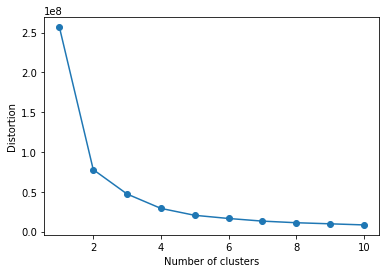

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [9]:
total = 0 
cls0 = df_data[cls == 0]
print(cls0.shape)
display(cls0.head())
# print( cls0.loc['mean area'])

(99, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.04061,0.02791,0.01282,0.02008,0.004144,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480


In [10]:
df_data['cls'] = cls
print(df_data.shape)
display(df_data.head())

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cls
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,4
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
print(df_data.groupby(['cls']).mean())

     mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
cls                                                                            
0      18.448586     21.402727      120.931212  1070.461616         0.098252   
1      13.003478     18.601084       83.235567   529.879310         0.084844   
2      13.619671     20.441857       90.603429   585.541429         0.109155   
3      11.503578     17.644534       74.210124   413.118012         0.101267   
4      21.301667     22.478333      143.647222  1433.077778         0.109274   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
cls                                                                         
0            0.121548        0.140587             0.084594       0.183572   
1            0.062919        0.032513             0.021737       0.163823   
2            0.171499        0.171062             0.073224       0.206281   
3            0.092960        0.052776             0.03